# Seaborn Lecture Note $-$ Part 2
___

See [seaborn homepage](https://seaborn.pydata.org/introduction.html) for more detailed information and [documentation](https://seaborn.pydata.org/api.html), or visit their [Github page here](https://github.com/mwaskom/seaborn).
<br><br>
Tutorial page for seaborn:
https://seaborn.pydata.org/tutorial.html
___

This part covers **Categorical Plots**

___
## 2. Categorical Plots

We mainly focused on seeing the distribution of categorical columns such as gender, day/time, or any other categorical column in our dataframe.

In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2.1. `barplot()`

The most basic categorical plot. It is a general plot that allows us to aggregate the categorical data based off of some function (it's a *mean*, by default). We can also think of it as a visualization of a *groupby* action/function.

Common syntax:

`sns.barplot(x=categorical_column,y=numerical_observation_column,data=dataframe)`

`x` $-$ categoral column that we want to analyze.<br>
`y` $-$ numerical column that we want to observe the aggregation of.<br>
`data` $-$ data frame.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

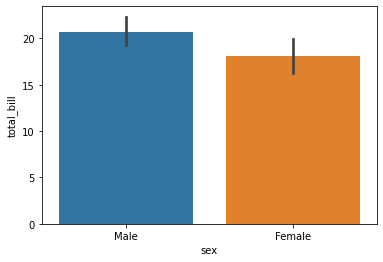

In [2]:
sns.barplot(x='sex',y='total_bill',data=tips)

As we can see above, barplot() is by default giving us the mean of total bill per categorical column value.

We can go ahead and add `estimator` object if we want to affect the actual grouping or aggregation. It sets as 'average' or 'mean' by default. If we have another aggregate function, we can add it to `estimator` argument. It should be a statistical functions (e.g. standard deviation).

For example, we can use standard deviation function from numpy library:

In [3]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

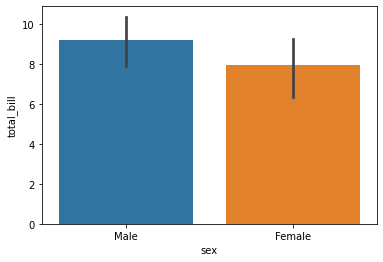

In [4]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### 2.2. `countplot()`

It's essentially the same as barplot(), except the estimator is explicitly counting the number of occurences. Because of that, we only set the `x` value.

The concept is the same with pandas count (pd.count) of the dataframe column of the `x` category.

<AxesSubplot:xlabel='sex', ylabel='count'>

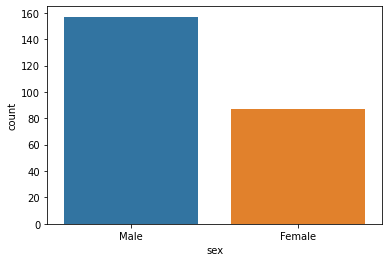

In [6]:
sns.countplot(x='sex',data=tips)

### 2.3. `Boxplot()`

Used to show the distribution of categorical data. It's also known as a *box and whisker plot*.

In detail, it shows the distribution of quantitative data in a way that facilitates comparison between the variables.

Syntax:

`sns.boxplot(x=categorical_column,y=numerical_column,data=dataframe)`

We can also add another argument, such as `hue=another_categorical_column`. `hue` allows us to kind of split up the box plots even further by another categorical column.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

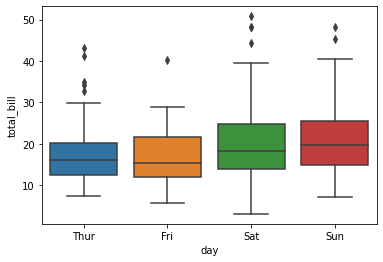

In [9]:
sns.boxplot(x='day',y='total_bill',data=tips)

Explanation of the box plot above:

Box plot shows us the **quartile** of dataset while the **whiskers** (the line extending parallel from the box) show the rest of the distribution of variability outside the upper and lower quartile(s).

The plots outside the whiskers are determined as outliers.

*note: quartile is the term for the box*

<AxesSubplot:xlabel='day', ylabel='total_bill'>

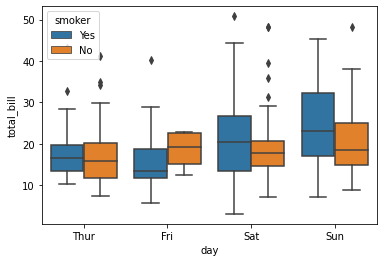

In [10]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

### 2.4. `violinplot()`

`sns.violinplot()` plays a similar role as boxplot(). It'll show the distribution of the data of some sort of category, and allows us to plot all the components that correspond to actual data point. It essentially shows the Kernel Density Estimation (KDE) of the underlying distribution.

It's kind of spliting the data in half the distribution of the points on its side. It allows you to reveal even more information about the data points themselves. **The downside** is that it's a little harder to interpret comparing to the box plot.

Syntax:

`sns.violinplot(x,y,data)`

<AxesSubplot:xlabel='day', ylabel='total_bill'>

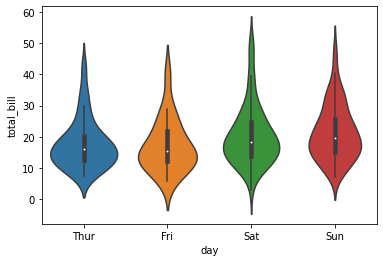

In [13]:
sns.violinplot(x='day',y='total_bill',data=tips)

We can also put `hue` argument in violinplot():

<AxesSubplot:xlabel='day', ylabel='total_bill'>

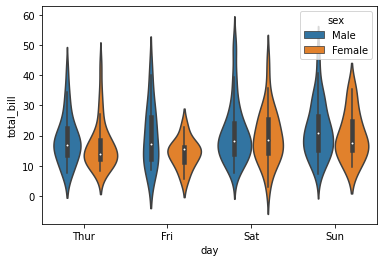

In [14]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

What's interesting about the `violinplot` is, as another argument, instead of putting two violinplots next to each other (since violinplot information essentially doubled up), we could have one half be one hue and the other half be another.

We can do that by passing the `split=True` argument,

<AxesSubplot:xlabel='day', ylabel='total_bill'>

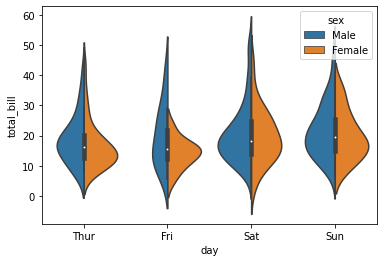

In [15]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

Now we can directly compare the distributions based off in another category and see how the categories themselves on the x axis compared to each other.

**IMPORTANT NOTE:**<br>
Keep in mind that we will spend more time to analyze the visualization when using `violinplot()`. It's a less common and familiar categorical plot type, i.e. comparing to the `boxplot()`, especially for those who aren't used in data science.

### 2.5. `stripplot()`

`sns.stripplot()` is another advance visualization method, which is probably the simplest one. It essentially draws a scatter plot where one variable is categorical.

Syntax:

`sns.stripplot(x,y,data)`

<AxesSubplot:xlabel='day', ylabel='total_bill'>

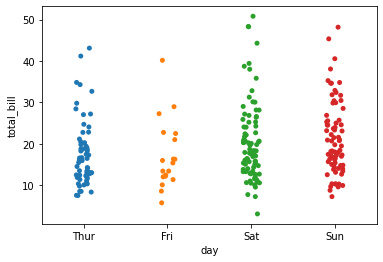

In [16]:
sns.stripplot(x='day',y='total_bill',data=tips)

There we have a scatterplot of each category (i.e. day).

One issue with this plot type is that we can't really tell how many points are stacked on top of each other, especially when we deal with a very large number of data.

Fortunately in this particular dataframe example, we can still see a good resolution of separated stacked points. But for a larger dataset, we might encounter the issue.

What we can do to minimize such issue is to add another argument called `jitter`. When we set `jitter=True`, it will add a little bit of random noise to separate some of those stacked points.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

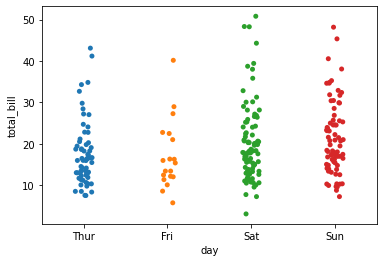

In [17]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

Just as in violinplot(), we can also add other arguments such as:

`hue` :

<AxesSubplot:xlabel='day', ylabel='total_bill'>

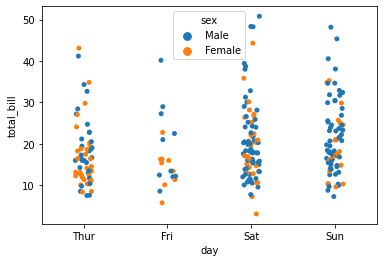

In [20]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

or `dodge=True` to split up based on the category stated in `hue` argument.

***UPDATE NOTES:*** 
`dodge` was previously known as `split` in stripplot. In Jose's lecture video, he still used split.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

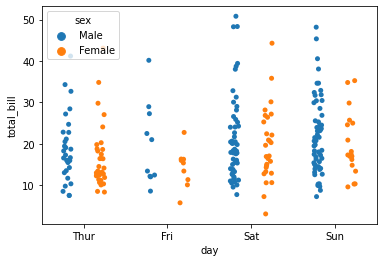

In [21]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

**IMPORTANT NOTE:**<br>
Again, keep in mind that `stripplot()` might be harder to interpret than `boxplot()` or even `violinplot()` unless the audience is familiar with this particular data analysis tool.

### 2.6. `swarmplot()`

Some people loves to combine the idea of strip plot versus violin plot and creates something known as a **swarm plot**. Seaborn has a dedicated function for it.

`sns.swarmplot()` is very similar to strip plot, except the points are adjusted so that they don't overlap $-$ which gives a better representation of the values' distribution.

Syntax:

`sns.swarmplot(x,y,data)`

<AxesSubplot:xlabel='day', ylabel='total_bill'>

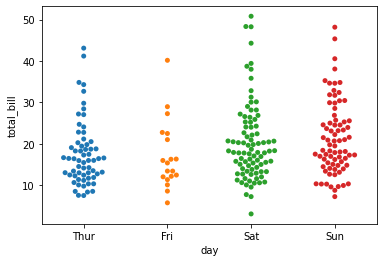

In [22]:
sns.swarmplot(x='day',y='total_bill',data=tips)

There we have the swarm plot. It's obvious how it's essentially a combination of a strip plot and violin plot. It shows the same distribution, except it actually shows all the points themselves.

**One drawback** of swarm plot is that sometimes they don't actually scale that well to very large numbers, both in terms of the ability to show all the points and taking a lot of computation to arrange them.

So, `swarmplot()` is **not recommended for a very large dataset**. Or worse, avoid using swarm plot if possible since people probably haven't encountered it before.

If in any case we want to use a swarm plot, it might be a good idea to combine it with violin plot. For example:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

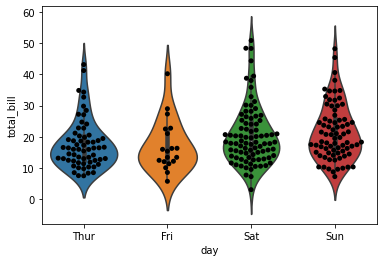

In [23]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

Now we can see there's a lot of information going on here, so we have to be more careful. This probably more useful for EDA (exploratory data analysis) and not for a presentation.

### 2.7. `factorplot()` -> `catplot()`

Factor plot is the most general form of all these categorical plots and is of a flexible function among all. It can call any kind of plot types that we have learn so far (e.g. bar, strip, etc.).

C:\ProgramData\Anaconda3\envs\data-science\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


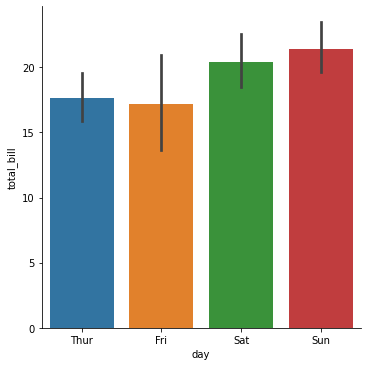

In [24]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

***New update (Seaborn v0.11.0 September 2020):***

The warning above shows that `factorplot()` is a deprecated function and will be removed soon in the future version. It is renamed into `catplot()` which has the same function.

So, it's better to use `catplot()` from now on.

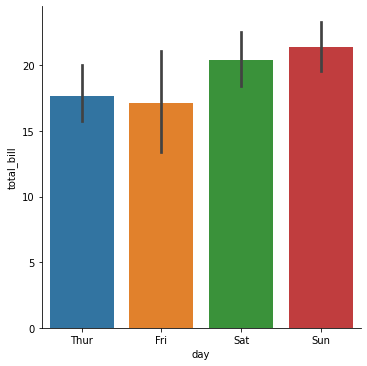

In [25]:
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

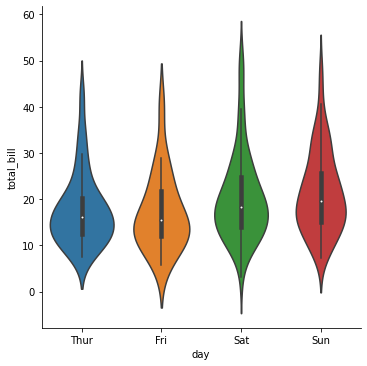

In [26]:
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

## *Part 2 Finished!*

Continue to >> [note part 3: Matrix Plots](./05-seaborn-note-3.ipynb)